> # ***"Handwritten Digit Recognition: Training and Evaluating a Neural Network (numpy, no TF/Keras)"***

Import the numpy library for numerical computations
Import the pandas library for data manipulation and analysis
Import the pyplot module from matplotlib for data visualization

Load the dataset from the specified CSV file into a pandas DataFrame


In [38]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

data = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')

Import the numpy library for numerical computations
Import the pandas library for data manipulation and analysis
Import the pyplot module from matplotlib for data visualization

Load the dataset from the specified CSV file into a pandas DataFrame

Convert the pandas DataFrame to a NumPy array for easier manipulation
Get the number of rows (m) and columns (n) in the dataset
Shuffle the dataset to randomize the order of examples before splitting into development and training sets

Split the first 1000 examples as the development set
Transpose the matrix to make examples as columns for easier manipulation
Y_dev contains the labels (first row) for the development set
X_dev contains the feature vectors (remaining rows) for the development set
Normalize the feature vectors in X_dev by dividing by 255 (standard normalization for image data)

The remaining examples (from 1000 to m) are used as the training set
Transpose the matrix to make examples as columns for easier manipulation
Y_train contains the labels (first row) for the training set
X_train contains the feature vectors (remaining rows) for the training set
Normalize the feature vectors in X_train by dividing by 255 (standard normalization for image data)
Get the number of training examples (m_train)


In [39]:
data = np.array(data)
m, n = data.shape
np.random.shuffle(data) # shuffle before splitting into dev and training sets

data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n]
X_dev = X_dev / 255.

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

Y_train contains the labels (first row) for the training set


In [40]:
Y_train

array([7, 4, 3, ..., 0, 4, 4])

Define a function to initialize parameters for the neural network
Initialize weights W1 with random values, scaled by the square root of the input size
Initialize biases b1 with random values, scaled by the square root of the output size
Initialize weights W2 with random values, scaled by the square root of the average of input and output sizes
Initialize biases b2 with random values, scaled by the square root of the input size
Return all initialized parameters

Define the ReLU activation function
Apply ReLU activation to the input by taking the maximum of zero and the input value

Define the softmax activation function
Subtract the maximum value in each column from Z for numerical stability
Apply the exponential function to Z and normalize by dividing by the sum of exponentials in each column
Return the softmax output

Define the forward propagation function
Compute the linear combination Z1 for the first layer, then apply ReLU activation to get A1
Compute the linear combination Z2 for the second layer, then apply softmax activation to get A2
Return intermediate values Z1, A1, Z2, and final output A2

Define the derivative of the ReLU function
Return a boolean mask where Z is greater than zero

Define the function to convert labels to one-hot encoding
Create a zero matrix for one-hot encoding
Set the corresponding entries to 1 for each label
Transpose the matrix to match the expected shape
Return the one-hot encoded matrix

Define the backward propagation function
Compute the one-hot encoding of labels
Calculate the gradient of Z2 (output layer) using the difference between predictions and one-hot labels
Calculate gradients of weights W2 and biases b2
Calculate the gradient of Z1 (hidden layer) using the derivative of ReLU and the gradients from the output layer
Calculate gradients of weights W1 and biases b1
Return all gradients

Define the function to update parameters
Update weights W1, b1, W2, and b2 using the computed gradients and learning rate (alpha)
Return the updated parameters


In [41]:
def init_params():
    W1 = np.random.normal(size=(10, 784)) * np.sqrt(1./(784))
    b1 = np.random.normal(size=(10, 1)) * np.sqrt(1./10)
    W2 = np.random.normal(size=(10, 10)) * np.sqrt(1./20)
    b2 = np.random.normal(size=(10, 1)) * np.sqrt(1./(784))
    return W1, b1, W2, b2
    return W1, b1, W2, b2
def ReLU(Z):
    return np.maximum(Z, 0)

def softmax(Z):
    Z -= np.max(Z, axis=0)  # Subtract max value for numerical stability
    A = np.exp(Z) / np.sum(np.exp(Z), axis=0)
    return A
    
def forward_prop(W1, b1, W2, b2, X):
    Z1 = W1.dot(X) + b1
    A1 = ReLU(Z1)
    Z2 = W2.dot(A1) + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def ReLU_deriv(Z):
    return Z > 0

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y):
    one_hot_Y = one_hot(Y)
    dZ2 = A2 - one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * ReLU_deriv(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1 - alpha * dW1
    b1 = b1 - alpha * db1    
    W2 = W2 - alpha * dW2  
    b2 = b2 - alpha * db2    
    return W1, b1, W2, b2

Define a function to get predictions from the output of the softmax layer
Return the index of the maximum value in each column, which corresponds to the predicted class

Define a function to compute accuracy of predictions
Print predictions and true labels for debugging
Calculate the accuracy as the ratio of correct predictions to the total number of labels
Return the accuracy

Define the gradient descent function to train the neural network
Initialize parameters (weights and biases) using the `init_params` function
Loop over the specified number of iterations
    Perform forward propagation to compute the activations and intermediate values
    Compute gradients for weights and biases using backward propagation
    Update parameters using the computed gradients and learning rate (alpha)
    Every 10 iterations, print the current iteration number
    Get predictions from the current output and compute accuracy
    Print the accuracy
Return the final parameters (weights and biases) after completing all iterations


In [42]:
def get_predictions(A2):
    return np.argmax(A2, 0)

def get_accuracy(predictions, Y):
    print(predictions, Y)
    return np.sum(predictions == Y) / Y.size

def gradient_descent(X, Y, alpha, iterations):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if i % 10 == 0:
            print("Iteration: ", i)
            predictions = get_predictions(A2)
            print(get_accuracy(predictions, Y))
    return W1, b1, W2, b2

Call the `gradient_descent` function to train the neural network
Pass in the training data features (X_train), training data labels (Y_train), learning rate (0.10), and number of iterations (500)
Receive the updated parameters (weights W1, biases b1, weights W2, biases b2) after training


In [43]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 500)

Iteration:  0
[7 7 7 ... 7 7 7] [7 4 3 ... 0 4 4]
0.08397560975609757
Iteration:  10
[7 4 7 ... 0 7 7] [7 4 3 ... 0 4 4]
0.17107317073170733
Iteration:  20
[7 4 3 ... 0 7 4] [7 4 3 ... 0 4 4]
0.3215609756097561
Iteration:  30
[7 4 3 ... 0 4 4] [7 4 3 ... 0 4 4]
0.3651463414634146
Iteration:  40
[2 4 3 ... 0 4 4] [7 4 3 ... 0 4 4]
0.39465853658536587
Iteration:  50
[2 4 3 ... 0 4 4] [7 4 3 ... 0 4 4]
0.5244634146341464
Iteration:  60
[2 4 3 ... 0 4 7] [7 4 3 ... 0 4 4]
0.6527073170731708
Iteration:  70
[2 4 3 ... 0 4 7] [7 4 3 ... 0 4 4]
0.691170731707317
Iteration:  80
[2 4 3 ... 0 4 7] [7 4 3 ... 0 4 4]
0.7164878048780488
Iteration:  90
[2 4 3 ... 0 4 7] [7 4 3 ... 0 4 4]
0.7394634146341463
Iteration:  100
[2 4 3 ... 0 4 7] [7 4 3 ... 0 4 4]
0.7598536585365854
Iteration:  110
[2 4 3 ... 0 4 7] [7 4 3 ... 0 4 4]
0.7775121951219512
Iteration:  120
[2 4 3 ... 0 4 4] [7 4 3 ... 0 4 4]
0.7917560975609756
Iteration:  130
[2 4 3 ... 0 4 4] [7 4 3 ... 0 4 4]
0.8039756097560976
Iteration:  140

Define a function to make predictions for a given set of inputs
Perform forward propagation using the given weights and biases to get the output activations (A2)
Get the predicted classes from the output activations
Return the predictions

Define a function to test the prediction for a specific index
Extract the image data for the given index from the training set
Make predictions for this specific image using the current weights and biases
Retrieve the true label for this image
Print the predicted class and the true label for comparison
Reshape the image data to its original 28x28 size and scale pixel values back to 0-255
Display the image using matplotlib with grayscale color mapping


In [44]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Call the `test_prediction` function for the image at index 0
Pass the current weights (W1, b1, W2, b2) to make predictions and visualize the result

Call the `test_prediction` function for the image at index 1
Pass the current weights (W1, b1, W2, b2) to make predictions and visualize the result

Call the `test_prediction` function for the image at index 2
Pass the current weights (W1, b1, W2, b2) to make predictions and visualize the result

Call the `test_prediction` function for the image at index 3
Pass the current weights (W1, b1, W2, b2) to make predictions and visualize the result


Prediction:  [2]
Label:  7


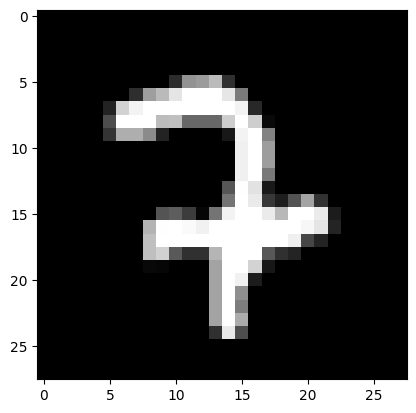

Prediction:  [4]
Label:  4


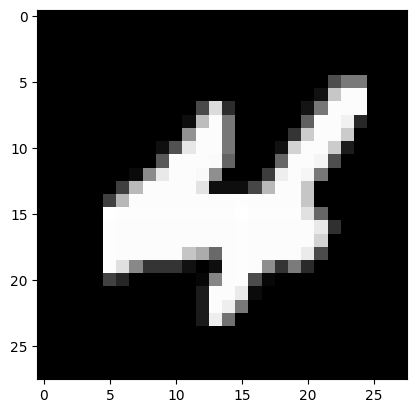

Prediction:  [3]
Label:  3


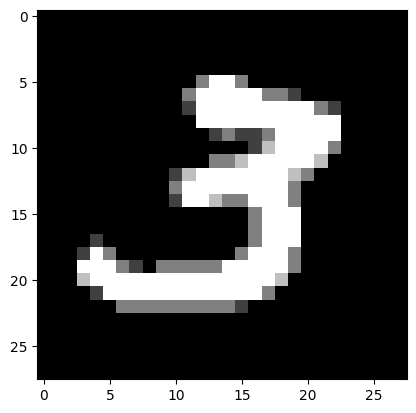

Prediction:  [5]
Label:  5


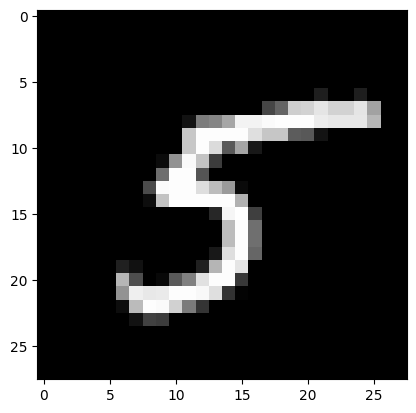

In [45]:
test_prediction(0, W1, b1, W2, b2)
test_prediction(1, W1, b1, W2, b2)
test_prediction(2, W1, b1, W2, b2)
test_prediction(3, W1, b1, W2, b2)

Generate predictions for the development set using the trained weights and biases
Pass the development set features (X_dev) and the trained parameters (W1, b1, W2, b2) to `make_predictions`

Calculate and print the accuracy of the predictions on the development set
Compare the predicted labels (`dev_predictions`) with the true labels (`Y_dev`) to determine the accuracy


In [47]:
dev_predictions = make_predictions(X_dev, W1, b1, W2, b2)
get_accuracy(dev_predictions, Y_dev)

[1 4 6 5 0 5 7 0 1 5 0 3 4 2 0 3 1 1 9 2 4 0 8 8 4 1 9 0 0 3 5 0 8 8 6 6 5
 9 9 7 7 3 9 9 9 6 0 8 7 1 6 0 6 0 6 6 5 6 0 0 7 6 7 9 3 0 6 1 6 9 7 6 8 7
 1 4 9 8 6 5 1 9 9 6 0 9 0 8 0 9 9 6 7 9 0 2 5 9 5 1 5 8 9 8 2 1 8 8 2 0 7
 7 0 1 1 9 8 7 5 4 1 6 6 7 6 8 2 3 5 3 4 5 6 2 2 2 2 9 8 8 6 5 7 3 3 0 0 8
 0 6 6 0 7 2 0 7 8 2 6 9 2 8 8 2 8 0 1 3 6 0 8 4 8 4 5 2 5 8 9 6 0 8 3 3 1
 8 9 1 4 8 1 9 4 5 7 4 4 9 3 7 6 2 3 1 6 9 8 1 7 7 3 9 8 5 2 3 3 3 9 3 5 1
 5 4 9 3 1 3 8 8 0 4 6 6 5 2 2 0 9 3 6 5 3 0 3 8 5 1 5 4 3 6 3 1 2 8 9 9 0
 3 0 3 8 2 1 3 6 4 9 3 8 9 4 8 9 5 2 7 0 8 0 0 4 8 0 4 0 4 8 1 1 4 7 9 8 4
 2 3 4 0 3 2 9 8 1 6 0 3 0 3 2 1 0 6 2 4 0 1 1 5 7 0 2 6 8 6 6 9 4 8 6 6 6
 6 8 7 3 8 1 6 1 7 6 8 8 6 2 9 5 3 3 2 7 8 1 2 8 4 8 4 3 5 1 7 9 3 7 4 0 2
 4 7 3 3 7 3 7 3 4 9 1 8 9 6 2 5 7 3 2 7 4 8 2 4 7 4 8 6 6 9 2 5 7 7 7 0 6
 0 0 6 7 3 6 7 9 5 2 9 1 1 4 6 7 6 8 7 6 8 9 4 3 3 7 1 3 5 8 9 3 5 3 3 7 0
 5 8 0 7 4 0 6 6 7 8 4 5 4 6 3 4 7 8 6 9 7 1 1 4 1 0 3 4 2 3 7 5 1 8 7 6 0
 9 1 7 1 6 4 6 9 6 4 9 1 

0.897

Still 90% accuracy, so our model generalized from the training data pretty well.